# Riconoscimento di tumori al seno maligni

Nello specifico, devi creare un modello di classificazione, in grado di riconoscere i tumori maligni, che:

1. Ha un accuracy sul set di test di almeno 0.98.
2. Ha un AUC sul set di test di almeno 0.98.
2. Ha un recall di 1 (0 falsi negativi).

Per valutare il modello, devi ricreare le seguenti visualizzazioni:

<img src="https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/4%20-%20La%20Classificazione/res/cancer_classifier_cm.png" width="400px"/>

<img src="https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/4%20-%20La%20Classificazione/res/cancer_classifier_auc.png" width="400px"/>


Una volta fatto, fornisci le previsioni per questi dati, salvando in un file excel le seguenti informazioni:
1. L'ID paziente
2. La previsione del modello
3. La probabilità associata alla classe predetta

In [1]:
import numpy as np
import pandas as pd

RANDOM_SEED = 0
np.set_printoptions(suppress=True)
BASE_URL="https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/"
df = pd.read_csv(BASE_URL+"breast_cancer.csv")
df.head()

,ID number,diagnosis,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [2]:
df["diagnosis"].value_counts()

diagnosis
B    353
M    210
Name: count, dtype: int64

In [3]:
#check missing values
#df.isna().sum() 

Il target è la colonna "diagnosis" che può avere valori B (benigno) e M (maligno).
In termini ML si ha:
M = positivo
B = negativo

Il modello ML da usare è regressione logistica

## IMPORTANTE
Bisogna sempre guardare un attimo il dataset di partenza. 
Per essere precisi al 100% bisognerebbe anche fare un'analisi di statistica descrittiva sulle features, per valutare eventuali outliers e robe simili. Considerando che si tratta di un esercizio, qui non lo faccio.
Tuttavia, bisogna togliere la colonna ID number che non è una feature, cioè non è una qualche misura utile per la classificazione, ma è solo un label. Lasciandola si rende il classificatore inutile, perchè i suoi valori elevati mascherano completamente l'effetto delle altre features e quindi si finisce per avere classificazioni totalmente errate.

#### Ricorda sempre di fare data cleaning 

In [4]:
#IMPORTANT: Exclude ID Number from dataset, because it isn't informative
df.drop("ID number", axis = 1, inplace=True)

#extract features and target
X = df.drop("diagnosis", axis = 1).values
y = df["diagnosis"].values

X.shape


(563, 30)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#use hold-out to validate model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

#Standardize features in order to have similar distribution for all variables
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Nota su standadizzazione:
Come riportato nella [documentazione](https://scikit-learn.org/stable/modules/preprocessing.html) di scikit-learn è meglio applicare la standardizzazione quando c'è di mezzo un modello lineare, con standardizzazione L1 o L2. La regressione logistica è uno di questi casi (scikit learn applica la L2 di default).

Inoltre, senza la standardizzazione esce fuori un warning riguardo alla convergenza dell'algoritmo, che non raggiunge la tolleranza richiesta (cioè fallisce), e quindi si hanno dei pesi non ottimizzati (la classificazione di conseguenza non è delle migliori).

In [6]:
from sklearn.linear_model import LogisticRegression

#In this case it's better use weights to balance classes, since in
#dataset the Positive (M) case is less represented.
model = LogisticRegression(class_weight="balanced")
#model = LogisticRegression()

model.fit(X_train,y_train)


LogisticRegression(class_weight='balanced')

# Prova di classificazione

In [7]:
y_pred_train = model.predict(X_train)
y_pred_prob_train = model.predict_proba(X_train)

y_pred_test = model.predict(X_test)
y_pred_prob_test = model.predict_proba(X_test)

In [8]:
model.classes_

array(['B', 'M'], dtype=object)

In [9]:
y_pred_prob_train

array([[0.98287572, 0.01712428],
       [0.0377188 , 0.9622812 ],
       [0.00157541, 0.99842459],
       [0.99052128, 0.00947872],
       [0.98515959, 0.01484041],
       [0.00246194, 0.99753806],
       [0.96796105, 0.03203895],
       [0.01404719, 0.98595281],
       [0.99960715, 0.00039285],
       [0.98279121, 0.01720879],
       [0.00116335, 0.99883665],
       [0.00000001, 0.99999999],
       [0.9998593 , 0.0001407 ],
       [0.00000018, 0.99999982],
       [0.00014974, 0.99985026],
       [0.23955714, 0.76044286],
       [0.76968293, 0.23031707],
       [0.96940516, 0.03059484],
       [0.00335949, 0.99664051],
       [0.99972177, 0.00027823],
       [0.95303832, 0.04696168],
       [0.95004425, 0.04995575],
       [0.89195752, 0.10804248],
       [0.00000322, 0.99999678],
       [0.9974994 , 0.0025006 ],
       [0.        , 1.        ],
       [0.99434894, 0.00565106],
       [0.73529573, 0.26470427],
       [0.00021283, 0.99978717],
       [0.9996949 , 0.0003051 ],
       [0.

In [10]:
#y_pred_train

# Prime valutazioni

In [11]:
from sklearn.metrics import confusion_matrix

#row = true values
#columns = predicted values
cm_train = confusion_matrix(y_train,y_pred_train, labels=["M","B"])
#M = postivie, B = negative
#cm_train

In [12]:
#y_pred_train

In [13]:
cm_test = confusion_matrix(y_test, y_pred_test, labels=["M","B"])
cm_test

array([[57,  1],
       [ 2, 81]], dtype=int64)

In [14]:
cm_test_df = pd.DataFrame(cm_test,
                      index = ["M","B"],
                      columns = ["M","B"])
cm_test_df

,M,B
M,57,1
B,2,81


Display confusion matrix

In [15]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns

def display_confusion_matrix(cm, set_type="train"):
    sns.heatmap(
    cm,
    annot = True,
    square = True,
    cmap = colormaps.get_cmap("inferno"),
    linewidth=.5,
    fmt = ".0f", #disable scientific notation,
    cbar = False
)

    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    plt.title(f"Confusion matrix for {set_type} set")
    plt.show()
    
    # confusion matrix structure:
    # TP | FN
    # FP | TN

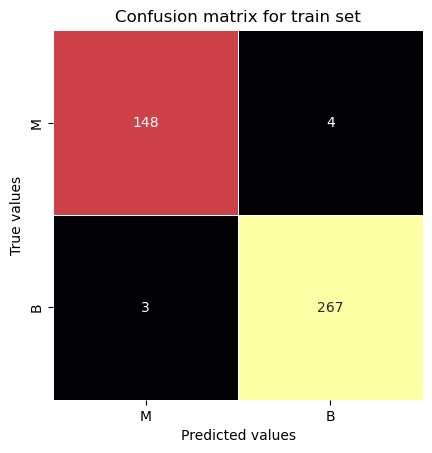

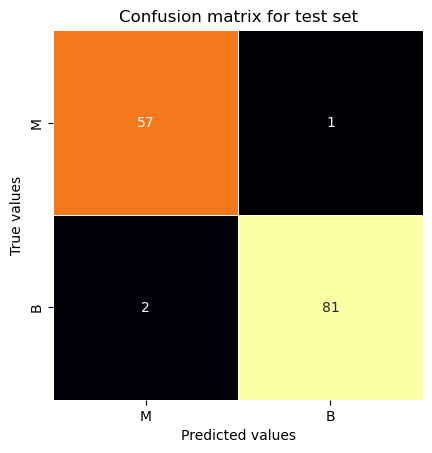

In [16]:


cm_train = pd.DataFrame(cm_train, 
                       index = ["M","B"],
                      columns = ["M","B"])

display_confusion_matrix(cm_train)

cm_test = pd.DataFrame(cm_test,
                      index = ["M","B"],
                      columns = ["M","B"])

display_confusion_matrix(cm_test,"test")

Metriche varie ottenute dalla CM

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def specificity_score(cm):
    """
    confusion matrix structure:
    TP | FN
    FP | TN
    
    specificity = TN / (TN + FP)
    """
    TP, FN, FP, TN = cm.ravel()
    specificity_value = TN / (TN + FP)
    return specificity_value

def classification_metrics(y_true,y_pred,y_pred_scores):
    acc = accuracy_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred,pos_label="M")
    sensibility = recall_score(y_true,y_pred,pos_label="M")
        
    cm = confusion_matrix(y_true,y_pred, labels=["M","B"])
    specificity = specificity_score(cm)
    auc = roc_auc_score(y_true,y_pred_scores)
        
    print(f"Accuracy: {acc:.3f}")
    print(f"Sensibility: {sensibility:.3f}")
    print(f"Specificity: {specificity:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"AUC: {auc:.3f}")

In [18]:
print("Train set")
classification_metrics(y_train,y_pred_train,y_pred_prob_train[:,1])
print("Test set")
classification_metrics(y_test,y_pred_test,y_pred_prob_test[:,1])

Train set
Accuracy: 0.983
Sensibility: 0.974
Specificity: 0.989
Precision: 0.980
AUC: 0.997
Test set
Accuracy: 0.979
Sensibility: 0.983
Specificity: 0.976
Precision: 0.966
AUC: 0.998


Bisogna aumentare la sensibilità sul test set (richiesto valore di 1, eliminare tutti i falsi negativi) e l'accuratezza sul test set (almeno 0.98).

Usando il modello bilanciato, cioè usando LogisticRegression(class_weight='balanced') le performances migliorano.
Non arrivo ancora ad eliminare tutti i falsi negativi però...

Per eliminare i falsi negativi devo usare una soglia di classificazione diversa da quella di default (che è di 0.5). 
Provo a scegliere la soglia di classificazione usando la curva ROC
(uso quella sul train set).

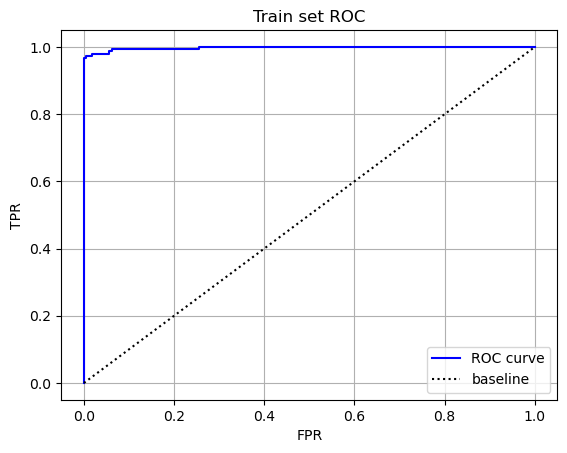

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob_train[:,1], 
                                         pos_label="M",
                                 drop_intermediate=False)
plt.plot(fpr,tpr,'-b', label="ROC curve")
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),':k',label="baseline")
plt.grid()
plt.title("Train set ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

Seleziono la prima soglia dove ottengo TPR (Sensibilità) = 1

In [20]:
threshold_index = np.argwhere(tpr==1)[0][0]
best_threshold = thresholds[threshold_index]
best_threshold

0.02959652339052501

In [21]:
y_pred_train_opt = np.where(y_pred_prob_train[:,1]>=best_threshold,"M","B")
y_pred_test_opt = np.where(y_pred_prob_test[:,1]>=best_threshold,"M","B")

Nuove matrici di confusione

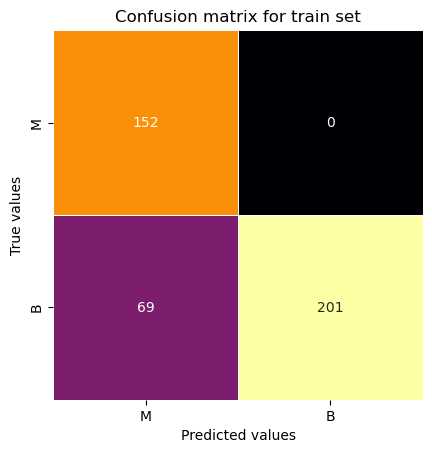

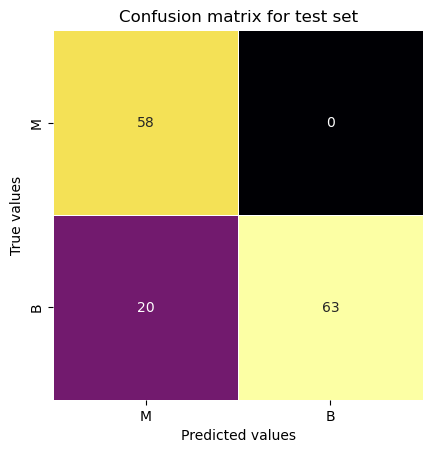

In [22]:
cm_train_opt = confusion_matrix(y_train, y_pred_train_opt, labels=["M","B"])
cm_train_opt = pd.DataFrame(cm_train_opt,
                           index = ["M","B"],
                      columns = ["M","B"])

cm_test_opt = confusion_matrix(y_test, y_pred_test_opt, labels=["M","B"])
cm_test_opt = pd.DataFrame(cm_test_opt,
                           index = ["M","B"],
                      columns = ["M","B"])

display_confusion_matrix(cm_train_opt)
display_confusion_matrix(cm_test_opt,"test")

Anche se qui sono andato bene sia sul test che sul train, in realtà il risultato specifico è casuale perchè dipende da come viene fatta la divisione tra train e test, che è casuale.

In [23]:
print("Train set")
classification_metrics(y_train,y_pred_train_opt,y_pred_prob_train[:,1])
print("Test set")
classification_metrics(y_test,y_pred_test_opt,y_pred_prob_test[:,1])

Train set
Accuracy: 0.836
Sensibility: 1.000
Specificity: 0.744
Precision: 0.688
AUC: 0.997
Test set
Accuracy: 0.858
Sensibility: 1.000
Specificity: 0.759
Precision: 0.744
AUC: 0.998


La soglia è ottimizzata per ridurre i falsi negativi e quindi ho sensibilità al 100%. ma questo porta ad avere più falsi positivi rispetto a prima e infatti la specificità diminuisce. Il che va bene se il classificatore è usato per una diagnosi di primo livello.
Non riesco comunque ad ottenere un'accuratezza del 98% come richiesto. 
Vedi la soluzione proposta e vedi che scopri.

NB: Ad ogni run i risultati possono essere diversi, per via della casualità dello split tra train e test.

## Previsioni di nuovi dati

In [24]:
df_new = pd.read_csv(BASE_URL+"breast_cancer_pred.csv")
df_new.head()

,ID number,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.70,711.2,0.1440,0.17730,0.23900,0.12880,0.2977,0.07259
2,8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.1312,0.27760,0.18900,0.07283,0.3184,0.08183
3,8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
4,859487,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.10390,0.05882,0.2383,0.06410


Come per l'allenamento, la colonna ID number non contiene info utili

In [25]:
X_new = df_new.drop("ID number", axis = 1).values

#same transformation of train and test set -> this transformation belogns to
#LM model.

X_new = ss.transform(X_new)

In [26]:
y_new_prob = model.predict_proba(X_new)

y_new_pred = np.where(y_new_prob[:,1] >= best_threshold, "M", "B")

y_prob_class = np.where(y_new_pred=="M", y_new_prob[:,1], y_new_prob[:,0])

In [27]:
df_final = pd.DataFrame(
{
    "ID number":df_new["ID number"].values,
    "diagnosis": y_new_pred,
    "probability": y_prob_class
})

df_final.head()

,ID number,diagnosis,probability
0,842302,M,1.000000
1,8510426,M,0.098961
2,8510653,B,0.995472
3,8510824,B,0.999968
4,859487,B,0.998318


In [28]:
df_final.to_excel("es1_predictions.xlsx")